In [11]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/financial-risk-for-loan-approval/Loan.csv
/kaggle/input/financial-risk-for-loan-approval/CSV Generation.py


# 1. What key aspects of  does the dataset Financial Risk for Loan Approval
 focus on, and what type of information does it provi?!

 The **"Financial Risk for Loan Approval"** dataset is a synthetic collection of personal and financial data, designed to aid in the development of predictive models for risk assessment and loan approval. It focuses on several key aspects related to an applicant's financial situation and stability:

### 1. **Demographic and Personal Information**:
   - **Age**: The applicant's age.
   - **EducationLevel**: The highest level of education attained.
   - **EmploymentStatus**: The applicant's current job situation.
   - **MaritalStatus**: Whether the applicant is married or not.
   - **NumberOfDependents**: The number of people financially dependent on the applicant.
   - **HomeOwnershipStatus**: Whether the applicant owns or rents their home.

### 2. **Financial Information**:
   - **AnnualIncome**: The total income of the applicant for the year.
   - **MonthlyIncome**: Monthly income of the applicant.
   - **DebtToIncomeRatio**: A ratio representing the applicant's total debt divided by their income, indicating financial strain.
   - **CreditScore**: A numerical value indicating the applicant's creditworthiness.
   - **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant.
   - **NumberOfOpenCreditLines**: The number of active credit lines the applicant holds.
   - **MonthlyDebtPayments**: The total monthly debt obligations.
   - **TotalAssets**: The applicant’s total assets.
   - **TotalLiabilities**: The applicant’s total liabilities or debts.
   - **NetWorth**: The difference between the applicant’s total assets and total liabilities.

### 3. **Loan Specific Information**:
   - **LoanAmount**: The amount of loan the applicant is requesting.
   - **LoanDuration**: The period over which the loan is to be repaid.
   - **LoanPurpose**: The reason the applicant is requesting the loan (e.g., home purchase, car purchase).
   - **LoanApproved**: The final outcome of the loan application (approved or denied).
   - **BaseInterestRate**: The starting interest rate for the loan.
   - **InterestRate**: The applied interest rate after assessment.

### 4. **Credit History**:
   - **BankruptcyHistory**: Information about any prior bankruptcies.
   - **PreviousLoanDefaults**: A history of any loan defaults by the applicant.
   - **PaymentHistory**: The applicant’s previous payment behaviors.
   - **LengthOfCreditHistory**: The duration of the applicant's credit history.
   - **NumberOfCreditInquiries**: The number of credit checks the applicant has undergone.

### 5. **Risk Assessment**:
   - **RiskScore**: A continuous score indicating the risk level of the applicant regarding the likelihood of loan default or financial instability.
   - **LoanApproved**: A binary outcome (0 or 1) indicating whether the loan application was approved.

The dataset provides a comprehensive foundation for risk modeling, offering data for both regression (to predict the risk score) and binary classification (to predict loan approval). It includes diverse financial and demographic features, making it suitable for sophisticated analysis and predictive modeling.e?

# 2. What is the primary objective of the project using this dataset?

The primary objective of the project using the **Financial Risk for Loan Approval** dataset is to **develop predictive models** that assess the likelihood of **loan approval** or **financial risk** based on an applicant's demographic and financial data. The goal is to:.-
2. **Classify Loan Approval**: Build a **binary classification model** to predict whether an applicant is likely to be **approved** or **denied** for a loan, based on their financial profile and historical behavior. This helps automate and streamline the loan approval process, making it faster and more consistenaking.



### 3. Data Preprocessing:

1. **Handle Missing Values, Outliers, and Duplicates**:
   - Address missing values using appropriate techniques like imputation or removal based on the dataset's context.
   - Detect and handle outliers to prevent them from negatively impacting the analysis.
   - Remove duplicate rows to ensure the data is clean and does not introduce bias.

2. **Convert `ApplicationDate` to DateTime Format**:
   - Convert the `ApplicationDate` column into a `datetime` datatype to facilitate time-based analysis.

3. **Apply SMOTE for Handling Class Imbalance**:
   - Use **SMOTE** (Synthetic Minority Over-sampling Technique) to balance the dataset by generating synthetic samples for the minority class in imbalanced columns, especially the target variable.

4. **Apply Label Encoding to Categorical Columns**:
   - Use **Label Encoding** to convert categorical features into numerical labels, making them suitable for machine learning models.

5. **Apply Feature Scaling**:
   - Apply scaling techniques (such as **Standard Scaling** or **Robust Scaling**) to numerical features to ensure they are on a similar scale, improving the performance of machs without including code.

# ***Let's start our Journey***

In [12]:
#import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='pandas')

In [13]:
#Read the dataset from a CSV file located in the specified path.
df = pd.read_csv('../input/financial-risk-for-loan-approval/Loan.csv')

df.head()# Displaying the first 5 rows of the dataset

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [14]:
# Show basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [15]:
# Check for missing values
df.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [16]:
# Loop through the  columns and display unique values
for col in df.columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-" * 50)

Unique values in ApplicationDate:
['2018-01-01' '2018-01-02' '2018-01-03' ... '2072-10-01' '2072-10-02'
 '2072-10-03']
--------------------------------------------------
Unique values in Age:
[45 38 47 58 37 49 34 46 42 18 19 33 27 43 29 23 57 40 22 41 26 44 32 36
 62 39 25 24 48 31 52 35 51 56 30 50 69 53 66 28 21 55 20 72 80 67 65 61
 59 54 64 63 76 60 70 71 68 78 77 73 75 74 79]
--------------------------------------------------
Unique values in AnnualIncome:
[39948 39709 40724 ... 30180 41025 53227]
--------------------------------------------------
Unique values in CreditScore:
[617 628 570 545 594 626 564 516 603 612 478 591 573 580 597 605 582 644
 553 630 635 503 555 462 608 622 576 592 667 559 535 520 571 552 604 508
 655 595 590 500 530 631 627 519 653 526 586 615 498 499 616 607 600 527
 611 574 647 649 620 672 619 523 531 618 588 540 517 663 524 623 585 596
 610 562 645 601 539 509 587 656 487 536 565 558 680 525 609 572 634 602
 669 621 551 560 439 521 643 581 598 513 548 

In [17]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [18]:
# Convert 'ApplicationDate' column to DateTime format to enable time-based analysis.
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])
df.set_index('ApplicationDate', inplace=True)

In [19]:
# Summary statistics for numeric columns
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [21]:
# Get the value counts for each column in the DataFrame
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("---------------------------------")


Value counts for Age:
Age
18    803
40    715
39    682
42    676
37    669
     ... 
80      8
74      8
76      4
78      3
79      3
Name: count, Length: 63, dtype: int64
---------------------------------
Value counts for AnnualIncome:
AnnualIncome
15000     584
300000     26
68064       4
24627       4
36604       4
         ... 
48316       1
50463       1
25001       1
22593       1
53227       1
Name: count, Length: 17516, dtype: int64
---------------------------------
Value counts for CreditScore:
CreditScore
609    204
593    182
585    181
604    180
602    180
      ... 
385      1
387      1
693      1
381      1
383      1
Name: count, Length: 322, dtype: int64
---------------------------------
Value counts for EmploymentStatus:
EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64
---------------------------------
Value counts for EducationLevel:
EducationLevel
Bachelor       6054
High School    5908
Associate     

***After performing the analysis, we will conduct a detailed examination of the data to gain deeper insights.***

* Question1: What insights can you gather from the histogram of the loan_data dataset? How do the distributions of key numerical features like Age, AnnualIncome, and LoanAmount look?*

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AnnualIncome'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'LoanAmount'}>],
       [<Axes: title={'center': 'LoanDuration'}>,
        <Axes: title={'center': 'NumberOfDependents'}>,
        <Axes: title={'center': 'MonthlyDebtPayments'}>,
        <Axes: title={'center': 'CreditCardUtilizationRate'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLines'}>],
       [<Axes: title={'center': 'NumberOfCreditInquiries'}>,
        <Axes: title={'center': 'DebtToIncomeRatio'}>,
        <Axes: title={'center': 'BankruptcyHistory'}>,
        <Axes: title={'center': 'PreviousLoanDefaults'}>,
        <Axes: title={'center': 'PaymentHistory'}>],
       [<Axes: title={'center': 'LengthOfCreditHistory'}>,
        <Axes: title={'center': 'SavingsAccountBalance'}>,
        <Axes: title={'center': 'CheckingAccountBalance'}>,
        <Axes: 

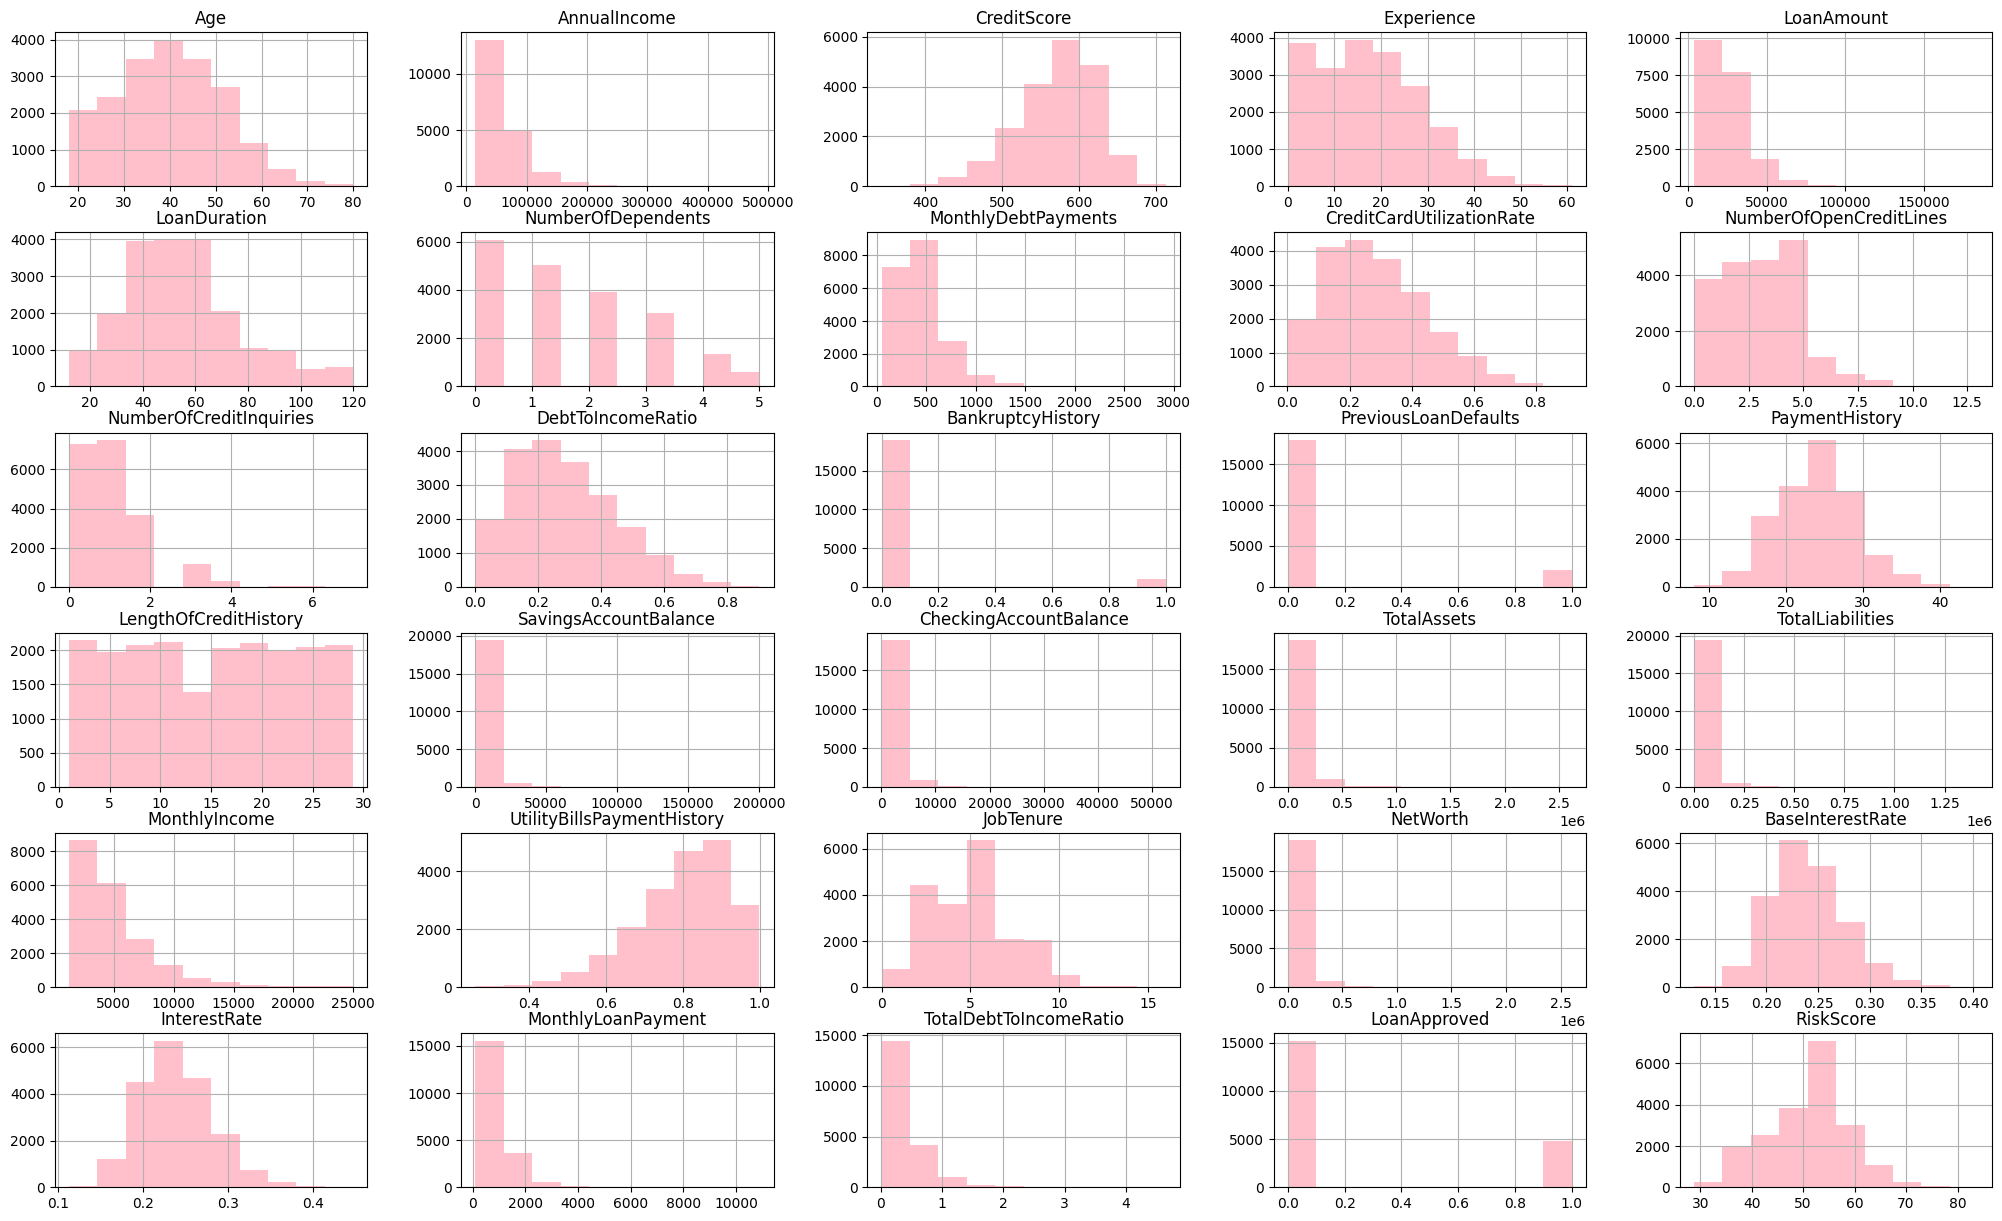

In [33]:
df.hist(figsize=(25, 15), color='pink')


* Question2: Is there a relationship between annual income and risk score?*

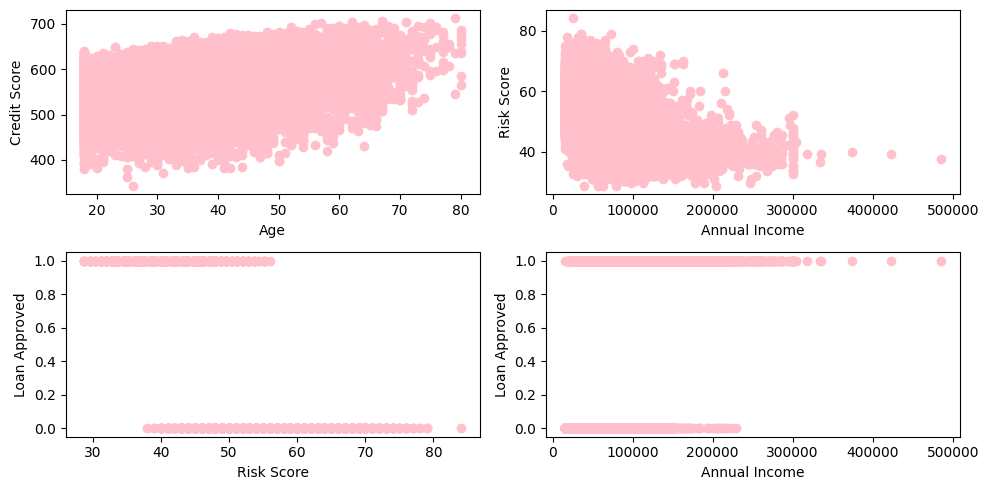

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Scatter plot for Age vs CreditScore
axes[0, 0].scatter(x=df["Age"], y=df["CreditScore"], color='pink')
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Credit Score")

# Scatter plot for AnnualIncome vs RiskScore
axes[0, 1].scatter(x=df["AnnualIncome"], y=df["RiskScore"], color='pink')
axes[0, 1].set_xlabel("Annual Income")
axes[0, 1].set_ylabel("Risk Score")

# Scatter plot for RiskScore vs LoanApproved
axes[1, 0].scatter(x=df["RiskScore"], y=df["LoanApproved"], color='pink')
axes[1, 0].set_xlabel("Risk Score")
axes[1, 0].set_ylabel("Loan Approved")

# Scatter plot for AnnualIncome vs LoanApproved
axes[1, 1].scatter(x=df["AnnualIncome"], y=df["LoanApproved"], color='pink')
axes[1, 1].set_xlabel("Annual Income")
axes[1, 1].set_ylabel("Loan Approved")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


*Question3: What is the distribution of loan applicants based on their marital status, and how does it reflect the proportions of married, single, and other marital categories in the dataset?*

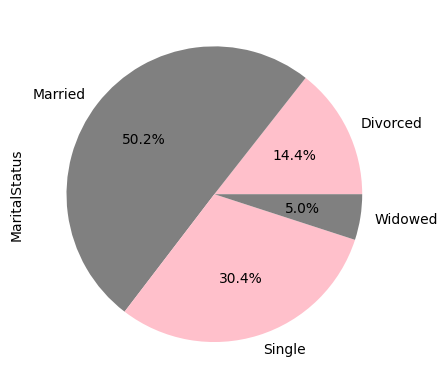

In [39]:
# Group by MaritalStatus and plot as a pie chart with pink and grey colors
df["MaritalStatus"].groupby(df["MaritalStatus"]).count().plot(
    kind="pie", 
    autopct='%1.1f%%', 
    colors=['pink', 'grey']
)

# Display the pie chart
plt.show()


*Question4. What is the distribution of the 'LoanApproved' column (binary outcome)*

<Axes: xlabel='LoanApproved'>

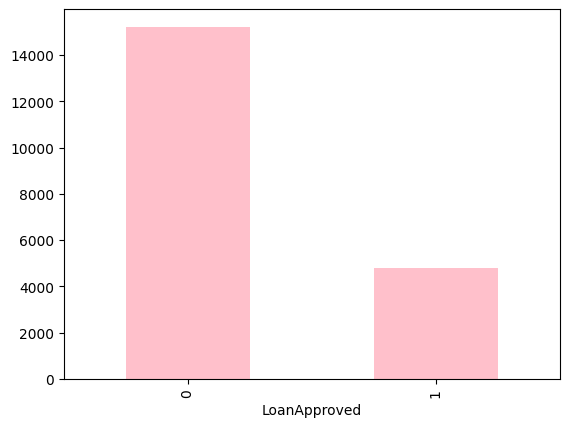

In [40]:
df['LoanApproved'].value_counts().plot(kind='bar', color='pink')


*Question5. What is the distribution of the 'RiskScore' column?*


<Axes: ylabel='Frequency'>

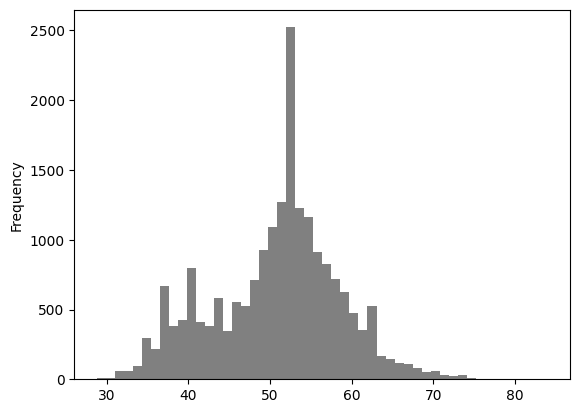

In [41]:
df['RiskScore'].plot(kind='hist', bins=50, color='grey')


*Question6. How are 'AnnualIncome' and 'RiskScore' related?*


<Axes: xlabel='AnnualIncome', ylabel='RiskScore'>

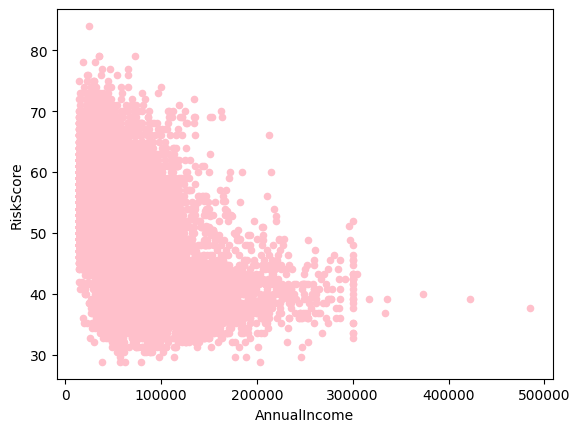

In [42]:
df.plot.scatter(x='AnnualIncome', y='RiskScore', color='pink')


*Question7. What percentage of applicants have 'BankruptcyHistory'?*

<Axes: ylabel='proportion'>

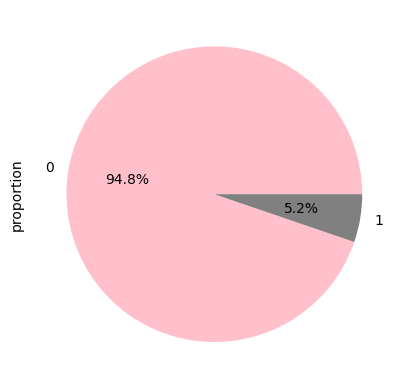

In [44]:
df['BankruptcyHistory'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'grey'])


*Question8. What is the distribution of 'CreditCardUtilizationRate' by 'HomeOwnershipStatus'?*

<Axes: title={'center': 'CreditCardUtilizationRate'}, xlabel='HomeOwnershipStatus'>

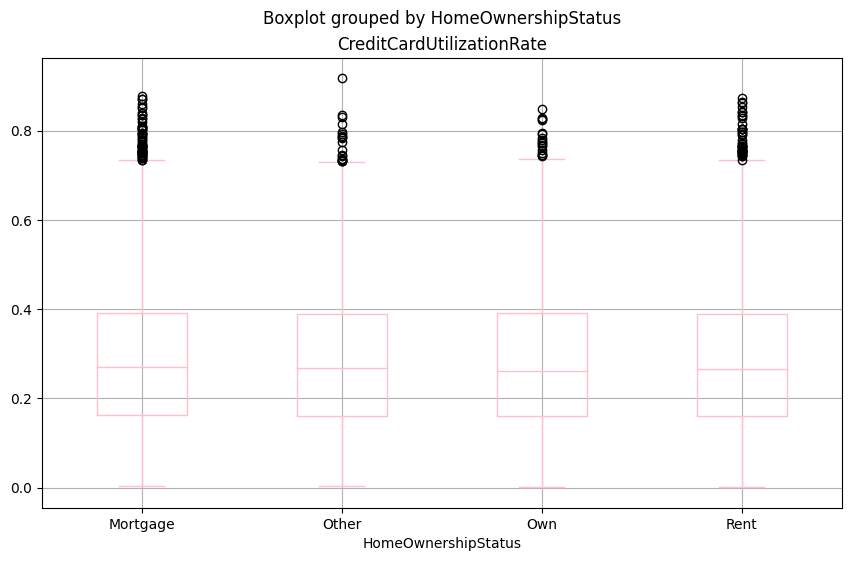

In [45]:
df.boxplot(column='CreditCardUtilizationRate', by='HomeOwnershipStatus', figsize=(10, 6), color='pink')


In [22]:
X=df.drop('LoanApproved',axis=1)
y=df[['LoanApproved']]

In [23]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for cols in X.select_dtypes('object').columns:
    X[cols]=le.fit_transform(X[cols])

In [24]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [26]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [27]:
y_train.value_counts()

LoanApproved
0               12237
1               12237
Name: count, dtype: int64

In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [29]:
rf_model = RandomForestClassifier(random_state=42)
#rf_model = RandomForestClassifier(criterion = 'gini',n_estimators=160,random_state=0)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

/tmp/ipykernel_24/1816228377.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Random Forest Accuracy: 0.99175
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2983
           1       0.98      0.99      0.98      1017

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

Random Forest Confusion Matrix:
 [[2962   21]
 [  12 1005]]


In [30]:
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))

XGBoost Accuracy: 0.999
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2983
           1       1.00      1.00      1.00      1017

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

XGBoost Confusion Matrix:
 [[2980    3]
 [   1 1016]]


In [31]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression Model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predict on the test set
logreg_predictions = logreg_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logreg_predictions))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logreg_predictions))

# Decision Tree Classifier Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

# Support Vector Machine Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate SVM
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.99975
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2983
           1       1.00      1.00      1.00      1017

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Logistic Regression Confusion Matrix:
 [[2982    1]
 [   0 1017]]
Decision Tree Accuracy: 0.99
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2983
           1       0.98      0.98      0.98      1017

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

Decision Tree Confusion Matrix:
 [[2959   24]
 [  16 1001]]


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.99925
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2983
           1       1.00      1.00      1.00      1017

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

SVM Confusion Matrix:
 [[2983    0]
 [   3 1014]]


| Model              | Accuracy | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Confusion Matrix (0,0) | Confusion Matrix (0,1) | Confusion Matrix (1,0) | Confusion Matrix (1,1) |
|--------------------|----------|---------------|---------------|------------|------------|--------------|--------------|------------------------|------------------------|------------------------|------------------------|
| **Logistic Regression** | 0.99975  | 1.00          | 1.00          | 1.00       | 1.00       | 1.00         | 1.00         | 2982                   | 1                      | 0                      | 1017                   |
| **Decision Tree**     | 0.99     | 0.99          | 0.98          | 0.99       | 0.98       | 0.99         | 0.98         | 2959                   | 24                     | 16                     | 1001                   |
| **SVM**              | 0.99925  | 1.00          | 1.00          | 1.00       | 1.00       | 1.00         | 1.00         | 2983                   | 0                      | 3                      | 1014                   |
| **XGBoost**          | 0.999    | 1.00          | 1.00          | 1.00       | 1.00       | 1.00         | 1.00         | 2980                   | 3                      | 1                      | 1016                   |
| **Random Forest**    | 0.99175  | 1.00          | 0.98          | 0.99       | 0.99       | 0.99         | 0.98         | 2962                   | 21                     | 12                     | 1005                   |
